## Import modules

In [1]:
import pickle
import random
import structs.functions as utils
from structs.types import Result

## Import comparison results and split

In [2]:
# import
results: list[Result] = []
for i in range(16):
    with open(f"results/binary/standard_balanced-cosine/{i}.pkl", "rb") as reader:
        results.extend(pickle.load(reader))

random.shuffle(results)

y = [1 if (r.gesture1 == r.gesture2) else 0 for r in results]

# train/test split
x_train, x_test, y_train, y_test = utils.train_test_split(results, y, 0.75)

# cross-validation folds
x_train_folds, x_test_folds, y_train_folds, y_test_folds = utils.train_test_folds(x_train, y_train, 12)

In [3]:
# all counts
print(f"Dataset: {len(results)}")
print(f"  Train Split: {len(x_train)}")
for idx, fold in enumerate(x_train_folds):
    print(f"    Train Fold {idx}: {len(fold)}")
for idx, fold in enumerate(x_test_folds):
    print(f"    Test Fold {idx}: {len(fold)}")
print(f"  Test Split: {len(x_test)}")

Dataset: 478
  Train Split: 358
    Train Fold 0: 329
    Train Fold 1: 328
    Train Fold 2: 328
    Train Fold 3: 328
    Train Fold 4: 328
    Train Fold 5: 328
    Train Fold 6: 329
    Train Fold 7: 328
    Train Fold 8: 328
    Train Fold 9: 328
    Train Fold 10: 328
    Train Fold 11: 328
    Test Fold 0: 29
    Test Fold 1: 30
    Test Fold 2: 30
    Test Fold 3: 30
    Test Fold 4: 30
    Test Fold 5: 30
    Test Fold 6: 29
    Test Fold 7: 30
    Test Fold 8: 30
    Test Fold 9: 30
    Test Fold 10: 30
    Test Fold 11: 30
  Test Split: 120


## Finding thresholds
### Location

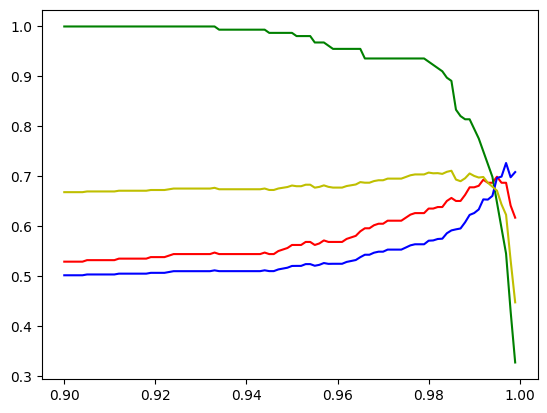

In [4]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="location",
    iterator=range(900, 1000),
    test_function=utils.test_location,
    x_values=x_train_folds[0],
    y_values=y_train_folds[0])

Accuracy : 0.6206896551724138
Precision: 0.6956521739130435
Recall   : 0.8
F1 Score : 0.7441860465116279


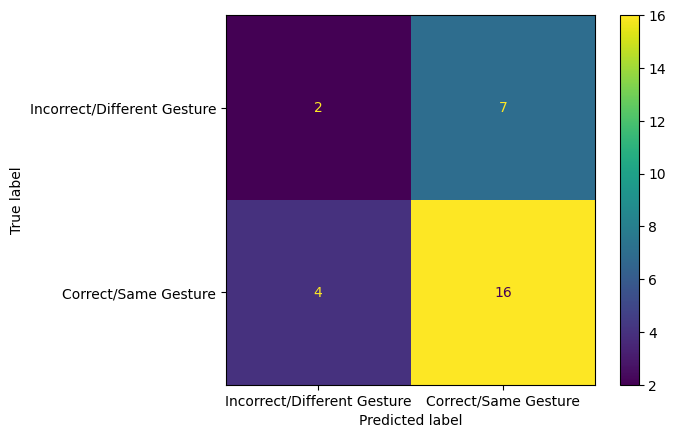

In [5]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[0],
    y_values=y_test_folds[0],
    thresholds={"location": 0.975},
    test_function=utils.test_location)

### Motion
#### Shoulder

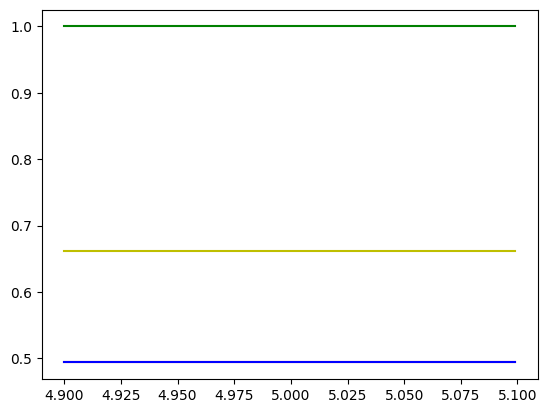

In [6]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_shoulder",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_motion,
    x_values=x_train_folds[1],
    y_values=y_train_folds[1],
    other_thresholds={
        "motion_elbow": 1,
        "motion_wrist": 1,
    })

Accuracy : 0.4666666666666667
Precision: 0.4666666666666667
Recall   : 1.0
F1 Score : 0.6363636363636364


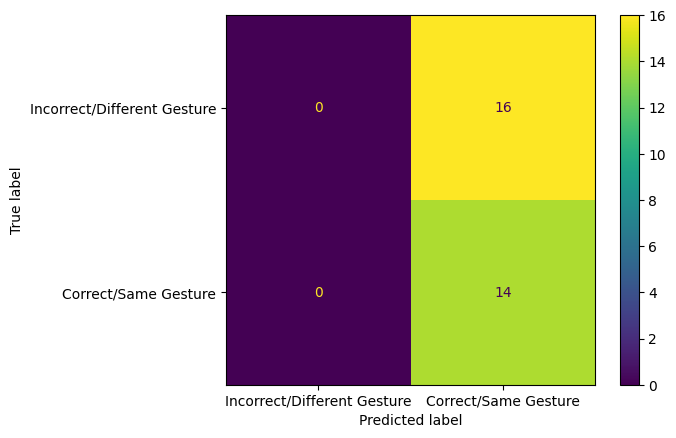

In [7]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[1],
    y_values=y_test_folds[1],
    thresholds={
        "motion_shoulder": 0.5,
        "motion_elbow": 1,
        "motion_wrist": 1,
    },
    test_function=utils.test_motion)

#### Elbow

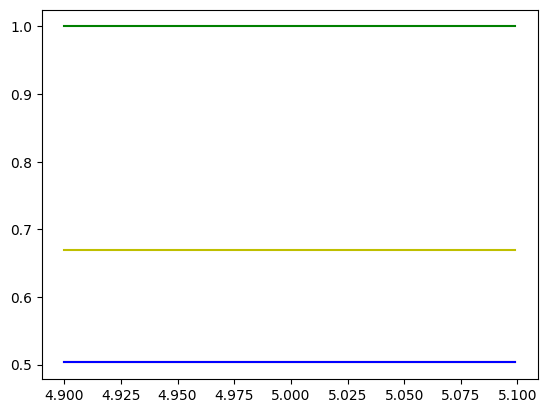

In [8]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_elbow",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_motion,
    x_values=x_train_folds[2],
    y_values=y_train_folds[2],
    other_thresholds={
        "motion_shoulder": 1,
        "motion_wrist": 1,
    })

Accuracy : 0.36666666666666664
Precision: 0.36666666666666664
Recall   : 1.0
F1 Score : 0.5365853658536586


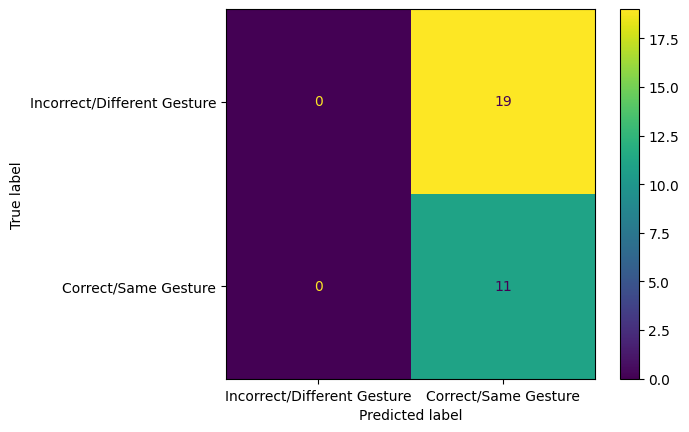

In [9]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[2],
    y_values=y_test_folds[2],
    thresholds={
        "motion_shoulder": 1,
        "motion_elbow": 0.5,
        "motion_wrist": 1,
    },
    test_function=utils.test_motion)

#### Wrist

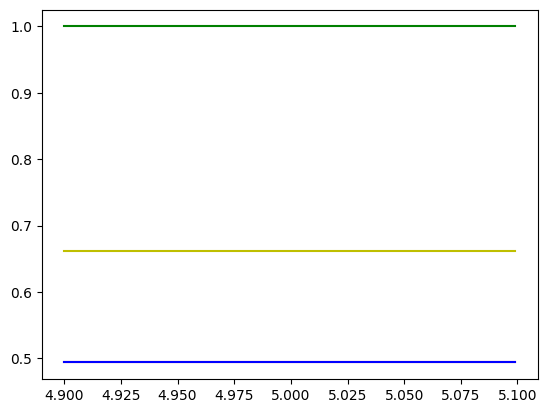

In [10]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_wrist",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_motion,
    x_values=x_train_folds[3],
    y_values=y_train_folds[3],
    other_thresholds={
        "motion_shoulder": 1,
        "motion_elbow": 1,
    })

Accuracy : 0.4666666666666667
Precision: 0.4666666666666667
Recall   : 1.0
F1 Score : 0.6363636363636364


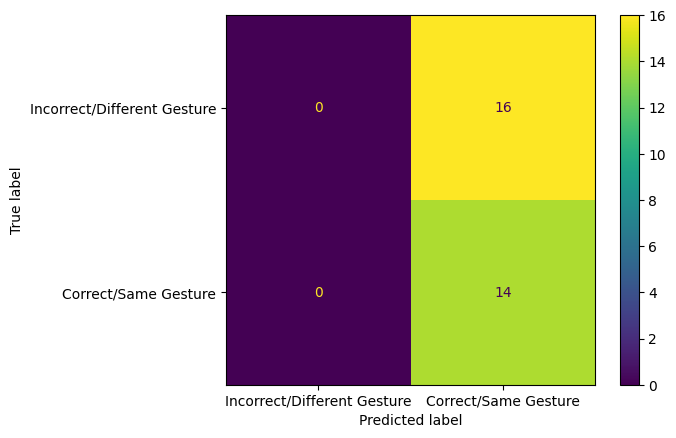

In [11]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[3],
    y_values=y_test_folds[3],
    thresholds={
        "motion_shoulder": 1,
        "motion_elbow": 1,
        "motion_wrist": 0.5,
    },
    test_function=utils.test_motion)

### Shape

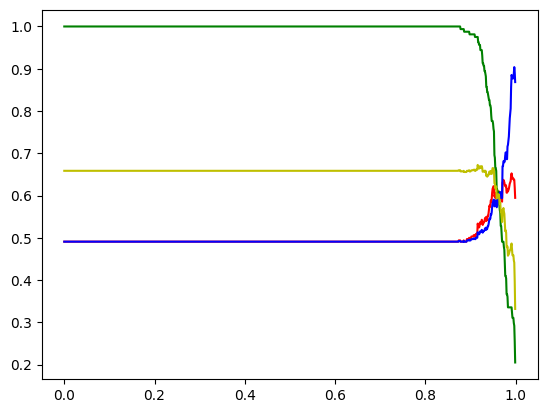

In [12]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="shape",
    iterator=range(1000),
    test_function=utils.test_shape,
    x_values=x_train_folds[4],
    y_values=y_train_folds[4])

Accuracy : 0.5333333333333333
Precision: 0.5172413793103449
Recall   : 1.0
F1 Score : 0.6818181818181818


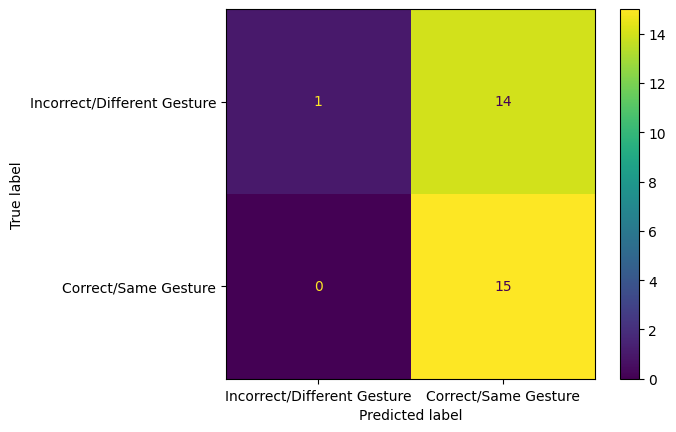

In [13]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[4],
    y_values=y_test_folds[4],
    thresholds={
        "shape": 0.92,
    },
    test_function=utils.test_shape)

### Face

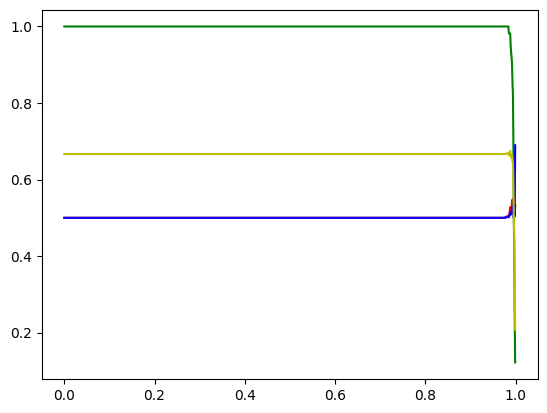

In [14]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="face",
    iterator=range(1000),
    test_function=utils.test_face,
    x_values=x_train_folds[5],
    y_values=y_train_folds[5])

Accuracy : 0.7333333333333333
Precision: 0.6111111111111112
Recall   : 0.9166666666666666
F1 Score : 0.7333333333333333


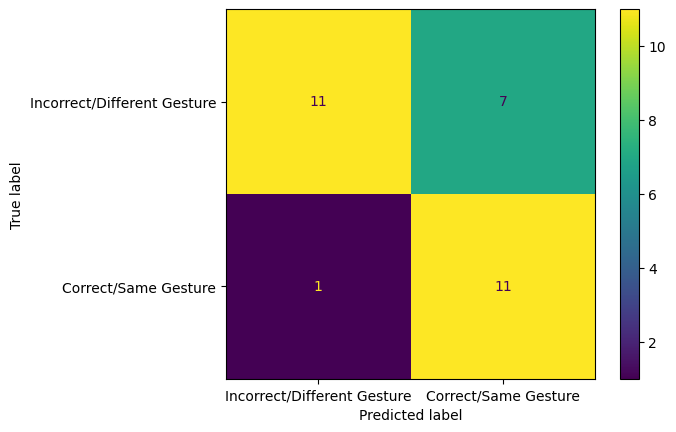

In [15]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[5],
    y_values=y_test_folds[5],
    thresholds={
        "face": 0.995,
    },
    test_function=utils.test_face)

## Optimizing thresholds
### Location

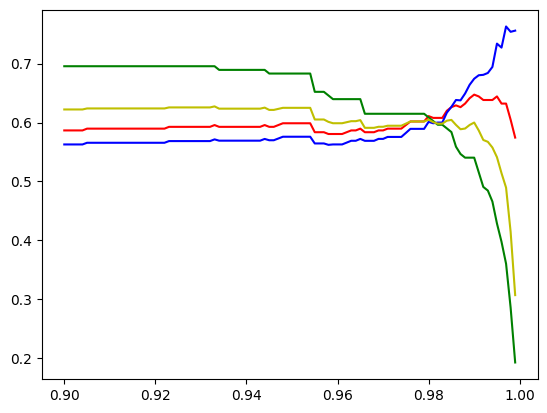

In [16]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="location",
    iterator=range(900, 1000),
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[6],
    y_values=y_train_folds[6],
    other_thresholds={
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    })

Accuracy : 0.6551724137931034
Precision: 0.6666666666666666
Recall   : 0.6666666666666666
F1 Score : 0.6666666666666666


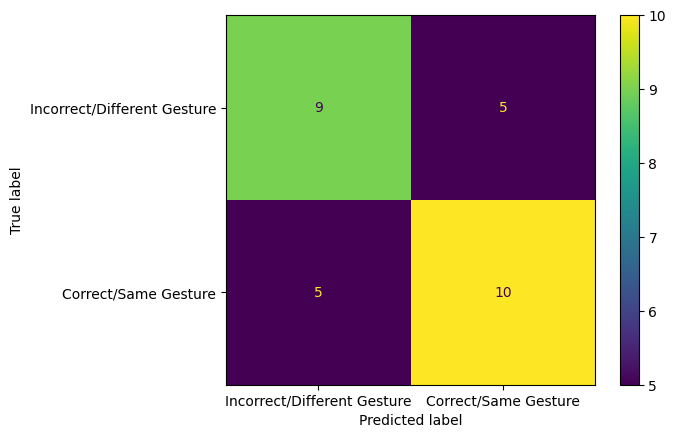

In [17]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[6],
    y_values=y_test_folds[6],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

### Motion
#### Shoulder

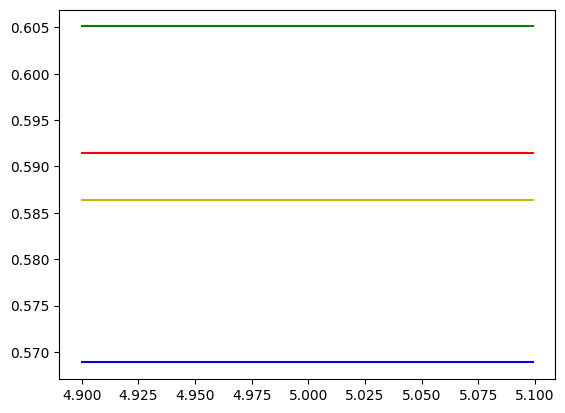

In [18]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_shoulder",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[7],
    y_values=y_train_folds[7],
    other_thresholds={
        "location": 0.975,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    })

Accuracy : 0.7
Precision: 0.7777777777777778
Recall   : 0.7368421052631579
F1 Score : 0.7567567567567568


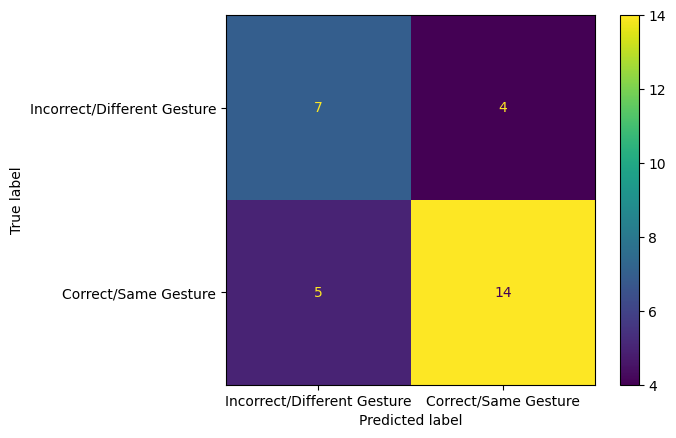

In [19]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[7],
    y_values=y_test_folds[7],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

#### Elbow

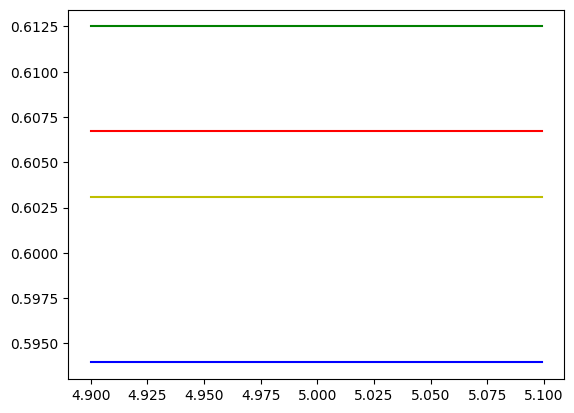

In [20]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_elbow",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[8],
    y_values=y_train_folds[8],
    other_thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    })

Accuracy : 0.5333333333333333
Precision: 0.55
Recall   : 0.6875
F1 Score : 0.6111111111111112


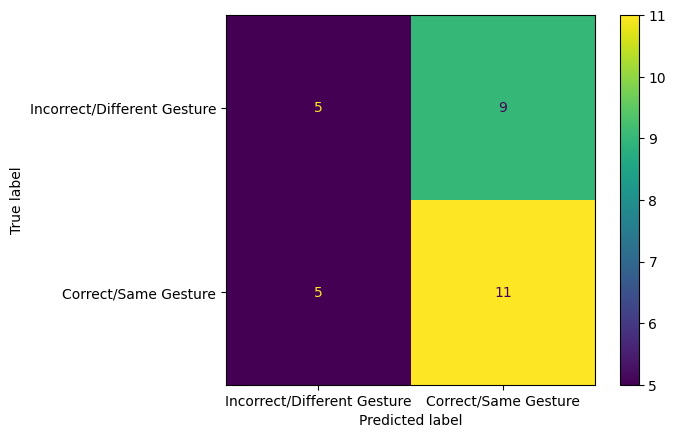

In [21]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[8],
    y_values=y_test_folds[8],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

#### Wrist

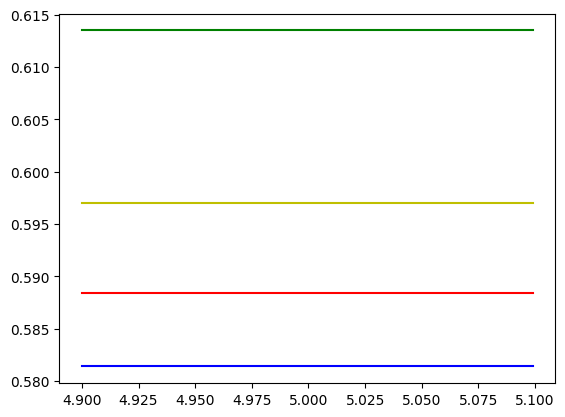

In [22]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="motion_wrist",
    iterator=range(4900, 5100),
    scale=1000,
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[9],
    y_values=y_train_folds[9],
    other_thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "shape": 0.92,
        "face": 0.995,
    })

Accuracy : 0.7333333333333333
Precision: 0.6923076923076923
Recall   : 0.6923076923076923
F1 Score : 0.6923076923076923


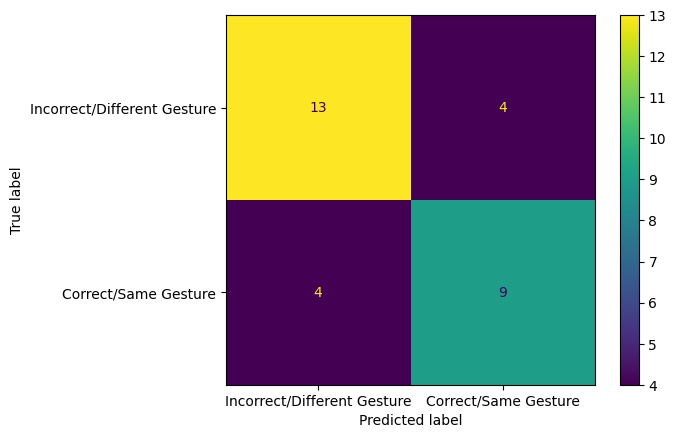

In [23]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[9],
    y_values=y_test_folds[9],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

### Shape

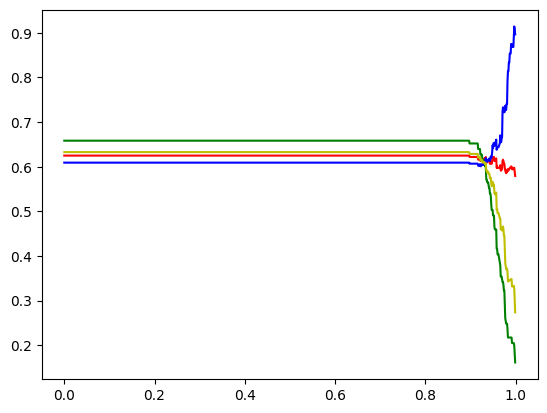

In [24]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="shape",
    iterator=range(1000),
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[10],
    y_values=y_train_folds[10],
    other_thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "face": 0.995,
    })

Accuracy : 0.43333333333333335
Precision: 0.42857142857142855
Recall   : 0.4
F1 Score : 0.41379310344827586


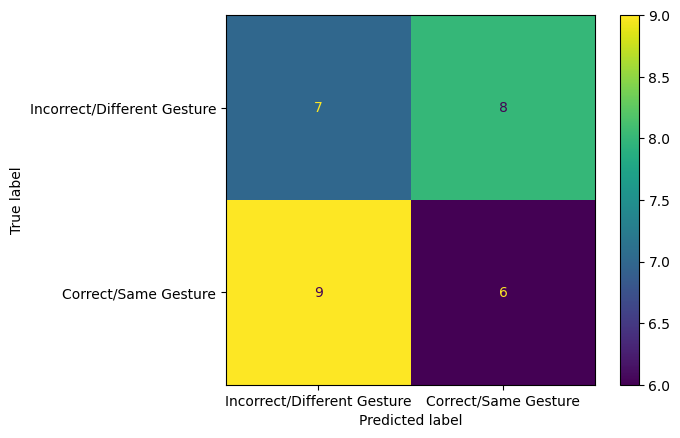

In [25]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[10],
    y_values=y_test_folds[10],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

### Face

In [ ]:
# graph different training thresholds
utils.plot_thresholds(
    threshold_name="face",
    iterator=range(1000),
    test_function=utils.test_with_face_binary,
    x_values=x_train_folds[11],
    y_values=y_train_folds[11],
    other_thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
    })

In [ ]:
# test set threshold
utils.test_thresholds(
    x_values=x_test_folds[11],
    y_values=y_test_folds[11],
    thresholds={
        "location": 0.975,
        "motion_shoulder": 0.5,
        "motion_elbow": 0.5,
        "motion_wrist": 0.5,
        "shape": 0.92,
        "face": 0.995,
    },
    test_function=utils.test_with_face_binary)

## Overall Testing

In [ ]:
thresholds = {
    "location": 0.975,
    "motion_shoulder": 0.5,
    "motion_elbow": 0.5,
    "motion_wrist": 0.5,
    "shape": 0.92,
    "face": 0.995,
}

utils.test_thresholds(
    x_values=x_test,
    y_values=y_test,
    thresholds=thresholds,
    test_function=utils.test_with_face_binary)